# Flashback propensity 

## Flashback videos [Steel liner]

### $H_{2}%=0$

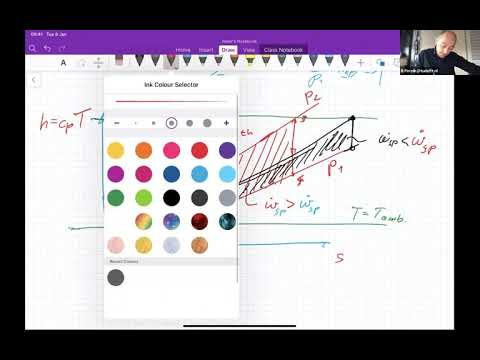

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('q3qBS7BRSQA',width = 600,height=400) 